&copy;  C. Lázaro, Universidad Politécnica de Valencia, 2015

# Form finding of planar flexible rods (1)

## 1 Motivation

[Schek, 1973](http://www.sciencedirect.com/science/article/pii/0045782574900450) & Linkwitz - **Force denisty method**  
1. Define net topology and restrained nodes
2. Prescribe force densities
3. Solve for nodal coordinates  

A similar procedure can be devised for flexible rods.

## 2 Problem definition

Given fixed conditions for the endpoints of a flexible and unextensible (Kirchhoff) rod, find the rod geometry for prescibed static data

## 3 Tentative algorithm

1. Define rod topology (nodes) and restrained nodes
2. Prescribe a minimal set of static data to compute bending moments and torques
3. Compute curvatures and twist
4. Solve for nodal coordinates

## 4 Static invariants

Consider a rod with forces/moments applied only at end sections.
The equilibrium equations are
$$\mathbf{N}^{'} = \mathbf{N} \times \mathbf{C}_{K}^{-1} \mathbf{M}$$
$$\mathbf{M}^{'} = \mathbf{N} \times \mathbf{C}_{\Gamma}^{-1} \mathbf{N} + \mathbf{M} \times \mathbf{C}_{K}^{-1} \mathbf{M}$$

The following quantities are invariants for a given configuration ([Lázaro, 2005](https://riunet.upv.es/handle/10251/1872)):  
- $\frac{1}{2}\,{\mathbf{M} \cdot \mathbf{C}_{K}^{-1} \mathbf{M}} + \mathbf{N} \cdot \mathbf{A_1}$ (Linear density of complementary deformation energy plus axial force)  
- $\mathbf{N} \cdot \mathbf{N}$ (Constant modulus of the end forces $\equiv$ Equilibrium of forces)  
- $\mathbf{M} \cdot \mathbf{N}$ (Constant modulus of the moment at the origin $\equiv$ Equilibrium of moments)

### 4.1 Planar case

In the planar case the equilibrium equations are
$$N^{'} = \frac{1}{EI}Q M$$
$$Q^{'} = -\frac{1}{EI}N M$$
$$M^{'} = -Q$$

and the two first invariants reduce to
- $\frac{1}{2} \frac{1}{EI} M^2 + N = constant$
- $N^2 + Q^2 = constant$  

The third invariant is null.  
Solutions of equilibrium lie at the orbits given by the intersections of both surfaces in the $(N, Q, M)$ space.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

#### 4.1.1 Visualizing the section force orbits
We may choose a parameter $\theta$ to traverse the orbit. Then, denoting the first constant as $\mathcal{H}$ and the second as $F^2$, invariant equations are equivalent to
$$N = F \cos\theta$$
$$Q = -F \sin\theta$$
$$M = \pm\sqrt{2EI (\mathcal{H} - F \cos\theta)}$$

The expression for the moment will fail when the root is less than 0. Therefore, we may distinguish the following situations:  
1. $\mathcal{H} > |F|$. The orbit will be a closed one with moments of equal sign all along it.
2. $\mathcal{H} = |F|$.
3. $\mathcal{H} < |F|$. The values of $\theta$ are in the interval $(\arccos\frac{\mathcal{H}}{F}, -\arccos\frac{\mathcal{H}}{F})$. We are traversing the orbit in decreasing $\theta$ sense; this chioce determines the side of the (buckled) structure.

In [2]:
EI = 5000.   #kN m^2

H = 3600.    #kN m/m
F1 = -2600.   #kN
F2 = -3600.   #kN
F3 = -4600.   #kN

phi = np.linspace(np.pi, -np.pi, 501)
theta0 = np.arccos(H/F3)
phi3 = np.linspace(theta0, - theta0, 501)

N1 = F1*np.cos(phi)
Q1 = -F1*np.sin(phi)
M1 = -np.sqrt(2*EI*(H - N1)) # sign is consistent with the choice of sense for theta

N2 = F2*np.cos(phi)
Q2 = -F2*np.sin(phi)
M2 = -np.sqrt(2*EI*(H - N2))

N3 = F3*np.cos(phi3)
Q3 = -F3*np.sin(phi3)
M3 = -np.sqrt(2*EI*(H - N3))

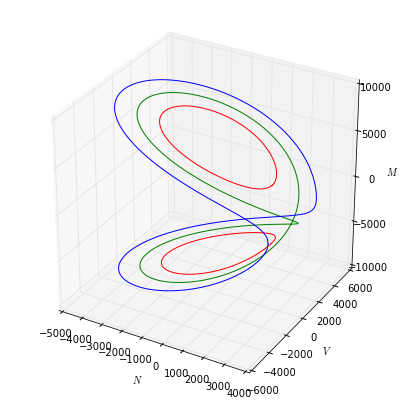

In [4]:
fig = plt.figure(figsize=(9., 9.))

ax = fig.gca(projection='3d')
ax.plot(N1, Q1, M1, color='r')
ax.plot(N1, Q1, -M1, color='r')
ax.plot(N2, Q2, M2, color='g')
ax.plot(N2, Q2, -M2, color='g')
ax.plot(N3, Q3, M3, color='b')
ax.plot(N3, Q3, -M3, color='b')

ax.set_xlabel('$N$')
ax.set_ylabel('$V$')
ax.set_zlabel('$M$')

#### 4.1.2 Numerical solution of the equilibrium equations  

According to [Hairer et al. (2006), p. 247](http://www.springer.com/gp/book/9783540306634) Lie-Poisson systems may be numerically solved by using splitting methods if the Hamiltonian can be splitted into independent functions (which is indeed the case for the Kirchhoff rod). The resulting method is:
$$N_{n+1} = N_n \cos(h(M_n - h Q_n/4)/EI) + Q_n \sin(h(M_n - h Q_n/4)/EI)$$
$$Q_{n+1} = Q_n \cos(h(M_n - h Q_n/4)/EI) - N_n \sin(h(M_n - h Q_n/4)/EI)$$
$$M_{n+1} = M_n - \frac{h}{2} (Q_n + Q_{n+1})$$

#### Pinned rod
Let's consider the case of a pinned rod subject to end forces of modulus $F$.
At the start of the rod $M = 0$ and $N^2 + Q^2 = F^2$. Thus, we have the freedom to prescribe the value of the first invariant. Once this is made, the orbit -and also the start orientation of the rod $\theta_0$- is defined and therefore $(N, Q, M)$ triplets on the orbit may be computed by the numerical method introduced above.  

We will experiment with the corresponding values for the third case, taking $h = 0.1$

In [4]:
print('F= {0:.0f} kN,    H = {1:.0f} kN m/m,    theta_0 = {2:.5f} rad'.format(F3, H, theta0))

F= -4600 kN,    H = 3600 kN m/m,    theta_0 = 2.46964 rad


In [5]:
sectionForces = []
N0 = F3*np.cos(theta0)
Q0 = -F3*np.sin(theta0)
M0 = 0.
sectionForces.append([N0, Q0, M0])

nEdges = 50
h = 0.1

Nn = N0
Qn = Q0
Mn = M0
for n1 in range(1, nEdges+1):
    Nn1 = Nn*np.cos(h*(Mn - h*Qn/4)/EI) + Qn*np.sin(h*(Mn - h*Qn/4)/EI)
    Qn1 = Qn*np.cos(h*(Mn - h*Qn/4)/EI) - Nn*np.sin(h*(Mn - h*Qn/4)/EI)
    Mn1 = Mn - 0.5*h*(Qn + Qn1)
    sectionForces.append([Nn1, Qn1, Mn1])
    Nn = Nn1
    Qn = Qn1
    Mn = Mn1

In [6]:
axialForce = np.array([force[0] for force in sectionForces])
shearForce = np.array([force[1] for force in sectionForces])
bendingMoment = np.array([force[2] for force in sectionForces])
H = bendingMoment**2/2/EI + axialForce

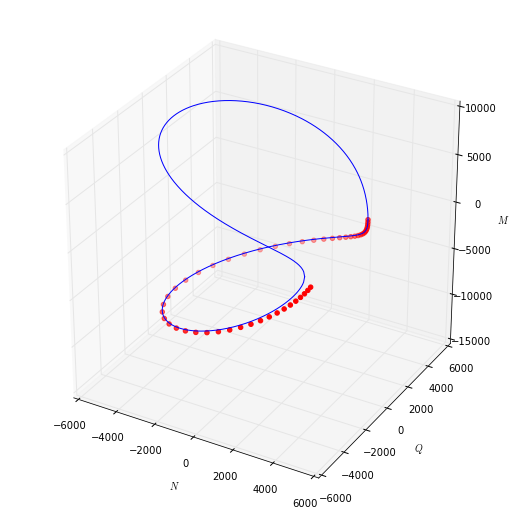

In [7]:
fig = plt.figure(figsize=(9., 9.))

ax = fig.gca(projection='3d')
ax.plot(N3, Q3, M3, color='b')
ax.plot(N3, Q3, -M3, color='b')
ax.scatter(axialForce, shearForce, bendingMoment, color='r')
ax.set_xlabel('$N$')
ax.set_ylabel('$Q$')
ax.set_zlabel('$M$')

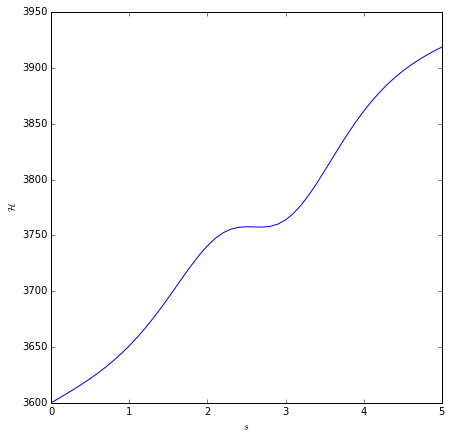

In [8]:
fig = plt.figure(figsize=(7., 7.))

ax = fig.gca()
ax.plot(np.linspace(0, h*nEdges, nEdges+1), H)
ax.set_xlabel('$s$')
ax.set_ylabel('$\mathcal{H}$')

The result shows that this numerical method does not preserve the Hamiltonian. Therefore, we try now with the implicit midpoint rule, which according to [Hairer et al. (2006), p. 247](http://www.springer.com/gp/book/9783540306634) preserves quadratic invariants
$$N_{n+1} = N_n + \frac{h}{4EI} (Q_n + Q_{n+1})(M_n + M_{n+1})$$
$$Q_{n+1} = Q_n - \frac{h}{4EI} (N_n + N_{n+1})(M_n + M_{n+1})$$
$$M_{n+1} = M_n - \frac{h}{2} (Q_n + Q_{n+1})$$  

Rearranging and dividing the first equation by the second one yields $N_{n+1}^2 + Q_{n+1}^2 = N_n^2 + Q_n^2$ (preservation of the Casimir). Substituting the third into the first shows the preservation of the Hamiltonian.

The drawback is that we end up with an implicit scheme in which the $n+1$ variables can't be isolated. In the next experiment we will advance each step using scipy.optimize.root non-linear solver.

In [9]:
import scipy.optimize

In [10]:
def implicitMidpoint(Xn1, Xn, h, EI):
    f = np.empty(3)
    f[0] = Xn1[0] - Xn[0] - h*(Xn[1] + Xn1[1])*(Xn[2] + Xn1[2])/4./EI
    f[1] = Xn1[1] - Xn[1] + h*(Xn[0] + Xn1[0])*(Xn[2] + Xn1[2])/4./EI
    f[2] = Xn1[2] - Xn[2] + h*(Xn[1] + Xn1[1])/2.
    return f

In [12]:
sectionForces = []
N0 = F3*np.cos(theta0)
Q0 = -F3*np.sin(theta0)
M0 = 0.
sectionForces.append([N0, Q0, M0])

nEdges = 50
h = 0.1

Xn = np.array([N0, Q0, M0])
for n1 in range(1, nEdges+1):
    eqSystem = lambda Xn1: implicitMidpoint(Xn1, Xn, h, EI) 
    solution = scipy.optimize.root(eqSystem, Xn)
    Xn1 = solution.x
    sectionForces.append(Xn1)
    Xn = Xn1

In [13]:
axialForce = np.array([force[0] for force in sectionForces])
shearForce = np.array([force[1] for force in sectionForces])
bendingMoment = np.array([force[2] for force in sectionForces])
H = bendingMoment**2/2/EI + axialForce

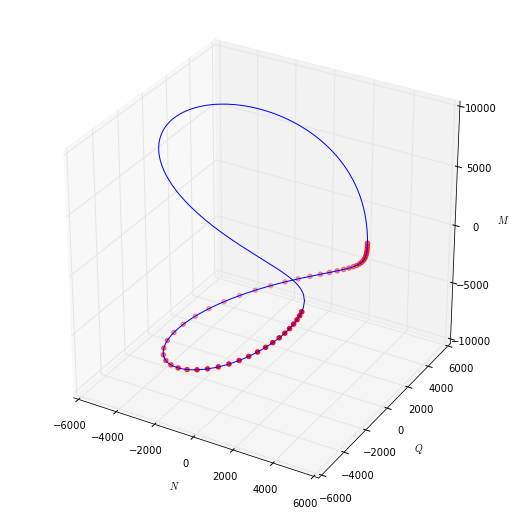

In [14]:
fig = plt.figure(figsize=(9., 9.))

ax = fig.gca(projection='3d')
ax.plot(N3, Q3, M3, color='b')
ax.plot(N3, Q3, -M3, color='b')
ax.scatter(axialForce, shearForce, bendingMoment, color='r')
ax.set_xlabel('$N$')
ax.set_ylabel('$Q$')
ax.set_zlabel('$M$')

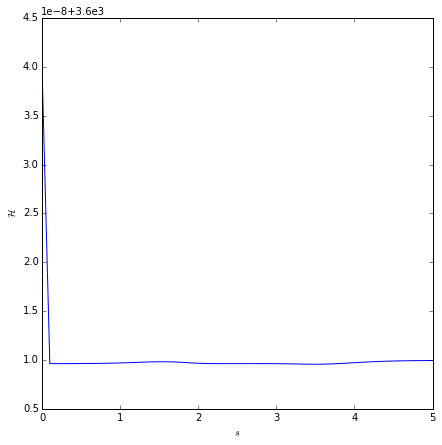

In [15]:
fig = plt.figure(figsize=(7., 7.))

ax = fig.gca()
ax.plot(np.linspace(0, h*nEdges, nEdges+1), H)
ax.set_xlabel('$s$')
ax.set_ylabel('$\mathcal{H}$')

This method yields an excellent result. However, if we are thinking in a formfinding problem of a pinned rod, we can't control that the endpoint of our solution falls on the endpoint of the rod. Therefore we will try another experiment using the recurrent step of the implicit midpoint rule.  

The basic idea is to let the interval size be a variable one, and to calculate every value following this procedure (exemplified in a pinned rod):  

1. Prescribe the end force $F$ and the Hamiltonian $\mathcal{H}$ (this fixes the orbit)
3. Parametrize the orbit through $\theta$. Using the condition $M = 0$ at the endpoints, calculate the start and end values of the parameter.
4. Calculate the triplets $(N, Q, M)$ at fixed intervals of the parameter (up to this point this is the same procedure we used to draw the orbit.)
5. (Key step) Calculate the values of $h$ between triplet values. They will be used later on to draw the solution.

In [50]:
EI = 5000.   #kN m^2

H = 3600.    #kN m/m
F = -4600.    #kN

theta0 = np.arccos(H/F)
theta = np.linspace(theta0, -theta0, nEdges+1)

N = F*np.cos(theta)
Q = -F*np.sin(theta)
M = -np.sqrt(2*EI*(H - N))

We are testing if the interval values computed from each formula are consistent
$$h_N = 4EI \frac{N_{n+1} - N_n}{(Q_n + Q_{n+1})(M_n + M_{n+1})}$$
$$h_Q = -4EI \frac{Q_{n+1} - Q_n}{(N_n + N_{n+1})(M_n + M_{n+1})}$$
$$h_M = -2 \frac{M_{n+1} - M_n}{Q_n + Q_{n+1}}$$

In [51]:
h = []
for n in range(nEdges):
    hNn = 4*EI*(N[n+1] - N[n])/(Q[n] + Q[n+1])/(M[n] + M[n+1])
    hQn = -4*EI*(Q[n+1] - Q[n])/(N[n] + N[n+1])/(M[n] + M[n+1])
    hMn = -2*(M[n+1] - M[n])/(Q[n] + Q[n+1])
    h.append([hNn, hQn, hMn])
# h

The experiment succeeds; if we examin the result for $h$, we see that every formula produces exactly the same results in each step. We have a straightforward and simple method to compute section forces and rod length for a prescribed traction and Hamiltonian.

In [52]:
h = []
for n in range(nEdges):
    hn = -2*(M[n+1] - M[n])/(Q[n] + Q[n+1])
    h.append(hn)

In [53]:
print('The length of the rod is {:.3f} m'.format(np.sum(h)))

The length of the rod is 5.274 m


### 4.2 Spatial case

The above equations may be expressed in terms of the components of the section forces and moments
- $\frac{1}{2}\Bigl( \frac{1}{GJ}(T)^2 + \frac{1}{EI_2}(M_2)^2 + \frac{1}{EI_3} (M_3)^2\Bigr) + N = constant$
- $N^2 + (Q_2)^2 + (Q_3)^2 = constant$
- $N\,T + Q_2\,M_2 + Q_3\,M_3 = constant$

## 5 Kinematic relationships

We refer to the field of Discrete Diferential Geometry. [Hoffmann, 2008](http://gcoe-mi.jp/temp/publish/217a739d5ac626a736cbf73949394d17.pdf) introduces the following concepts and definitions:

- A _discrete curve_ in $\mathbb{R}^n$ is a map $\gamma: I \in \mathbb{Z} \rightarrow \mathbb{R}^n$
- The _edge tangent vector_ is defined as the forward difference $\Delta\gamma_k := \gamma_{k+1} - \gamma_k$
- A discrete curve is called _parametrized by arc-length_ if $\|\Delta\gamma_k\| \equiv h = const. \neq 0$

### 5.1 Planar case

For planar curves we may work in the complex plane, i.e. $\gamma: I \in \mathbb{N} \rightarrow \mathbb{R}^2 \cong \mathbb{C}$. 

- The _vertex tangent vector_ of a planar discrete curve is given by...
- The _curvature_ of a arc-length parametrized (planar) discrete curve $\gamma$ is given by $\kappa = \frac{2}{h} \tan\frac{\phi}{2}$
- The _curvature_ of a general planar discrete curve $\gamma$ is defined at every vertex as $\kappa_n = \frac{4}{h_{n-1}+h_n} \tan\frac{\phi_n}{2}$

The **key result** for us is the following:  

The discrete curvature function $\kappa$ determines a parametrized discrete curve up to an Euclidean motion. The rotation at every vertex relates the normalized edge segments
$$\frac{\Delta\gamma_n}{h_n} = \frac{\Delta\gamma_{n-1}}{h_{n-1}} e^{i \phi_n}$$

The curve is then determined by the recurrent relation
$$\gamma_{n+1} = \gamma_n + \frac{h_n}{h_{n-1}} \Delta\gamma_{n-1} \, e^{i \phi_n}$$  

Note that the rotation operator transforming the direction of the discrete curve at every vertex can be expresed in terms of the curvature at the vertex through the following (exact) quotient
$$e^{i \phi_n} = \frac{1 + i \tan(\phi_n/2)}{1 - i \tan(\phi_n/2)} = \frac{\frac{4}{h_{n-1}+h_n} + i \kappa_n}{\frac{4}{h_{n-1}+h_n} - i \kappa_n}$$  

With this expression we may compute the elastica in a straightforward manner once we have prescribed key values. Let's return to the pinned rod...

In [54]:
kappa = M / EI
phi = np.zeros(nEdges)
rotor = np.zeros(nEdges) + 1j*np.zeros(nEdges)
for n in range(1, nEdges):
    phi[n] = 2.*np.arctan(kappa[n]*(h[n-1] + h[n])/4.)
    rotor[n] = (4./(h[n-1] + h[n]) + 1j * kappa[n])/(4./(h[n-1] + h[n]) - 1j * kappa[n])
np.sum(phi)/2

-2.4695156878039444

In [55]:
phi[0] = theta0
rotor[0] = np.exp(1j*phi[0])

In [56]:
gamma = np.zeros(len(kappa)) + 1j*np.zeros(len(kappa))
gamma[0] = 0.+0j
gamma[1] = gamma[0] + h[0]*rotor[0]
for n in range(1, len(kappa)-1):
    gamma[n+1] = gamma[n] + h[n]/h[n-1] * (gamma[n] - gamma[n-1]) * rotor[n]

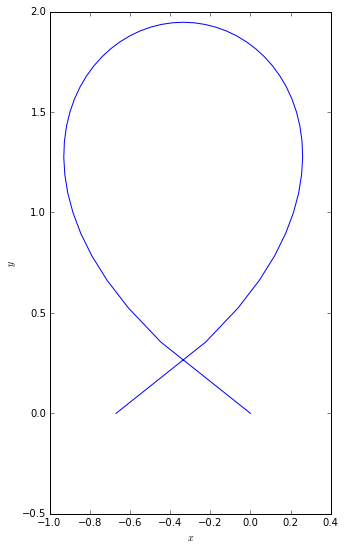

In [57]:
fig = plt.figure(figsize=(9,9))

ax = fig.gca(aspect='equal')
ax.plot(gamma.real, gamma.imag, color='b')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

In [58]:
print('Total rotation at the orbit: {:.5f}*pi rad'.format((theta[-1] - theta[0])/np.pi))
print('Total rotation computed with DDG: {:.5f}*pi rad'.format((np.sum(phi) - phi[0])/np.pi))

Total rotation at the orbit: -1.57222*pi rad
Total rotation computed with DDG: -1.57214*pi rad


Let's pack the code into a single tool and do a new experiment:

The length of the rod is 5.291 m


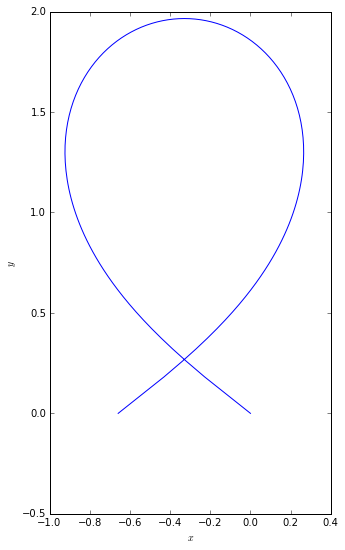

In [60]:
EI = 5000.   #kN m^2

H = 3600.    #kN m/m
F = -4600.    #kN

nEdges = 200
nVertex = nEdges + 1

theta0 = np.arccos(H/F)
theta = np.linspace(theta0, -theta0, nVertex)

N = F*np.cos(theta)
Q = -F*np.sin(theta)
M = -np.sqrt(2*EI*(H - N))

h = np.zeros(nEdges)
h[:] = -2*(M[1:] - M[0:-1])/(Q[0:-1] + Q[1:])    # pythonic looping

print('The length of the rod is {:.3f} m'.format(np.sum(h)))

kappa = M / EI
phi = np.zeros(nVertex-1)
rotor = np.zeros(nVertex-1) + 1j*np.zeros(nVertex-1)

phi[0] = theta0
phi[1:] = 2.*np.arctan(kappa[1:-1]*(h[0:-1] + h[1:])/4.) 

rotor[0] = np.exp(1j*phi[0])
rotor[1:] = (4./(h[0:-1] + h[1:]) + 1j * kappa[1:-1])/(4./(h[0:-1] + h[1:]) - 1j * kappa[1:-1])

gamma = np.zeros(nVertex) + 1j*np.zeros(nVertex)
gamma[0] = 0.+0j
gamma[1] = gamma[0] + h[0]*rotor[0]
for n in range(1, nVertex-1):
    gamma[n+1] = gamma[n] + h[n]/h[n-1] * (gamma[n] - gamma[n-1]) * rotor[n]
    
fig = plt.figure(figsize=(9,9))

ax = fig.gca(aspect='equal')
ax.plot(gamma.real, gamma.imag, color='b')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

In [61]:
print('Total rotation at the orbit: {:.5f}*pi rad'.format((theta[-1] - theta[0])/np.pi))
print('Total rotation computed with DDG: {:.5f}*pi rad'.format((np.sum(phi) - phi[0])/np.pi))

Total rotation at the orbit: -1.57222*pi rad
Total rotation computed with DDG: -1.57222*pi rad


We make a new experiment, this time with $F<\mathcal{H}$ which means that there are moments at the end sections

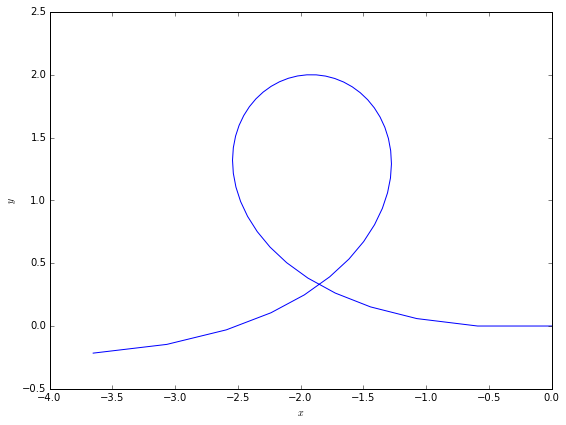

In [62]:
EI = 5000.   #kN m^2

H = 3600.    #kN m/m
F = -3500.    #kN

nEdges = 50
nVertex = nEdges + 1

if F > H:
    theta0 = np.arccos(H/F)
else:
    theta0 = np.pi
theta = np.linspace(theta0, -theta0, nVertex)

N = F*np.cos(theta)
Q = -F*np.sin(theta)
M = -np.sqrt(2*EI*(H - N))

h = np.zeros(nEdges)
h[:] = -2*(M[1:] - M[0:-1])/(Q[0:-1] + Q[1:])

kappa = M / EI
phi = np.zeros(nVertex-1)
rotor = np.zeros(nVertex-1) + 1j*np.zeros(nVertex-1)

phi[0] = theta0
phi[1:] = 2.*np.arctan(kappa[1:-1]*(h[0:-1] + h[1:])/4.) 

rotor[0] = np.exp(1j*phi[0])
rotor[1:] = (4./(h[0:-1] + h[1:]) + 1j * kappa[1:-1])/(4./(h[0:-1] + h[1:]) - 1j * kappa[1:-1])

gamma = np.zeros(nVertex) + 1j*np.zeros(nVertex)
gamma[0] = 0.+0j
gamma[1] = gamma[0] + h[0]*rotor[0]
for n in range(1, nVertex-1):
    gamma[n+1] = gamma[n] + h[n]/h[n-1] * (gamma[n] - gamma[n-1]) * rotor[n]
    
fig = plt.figure(figsize=(9,9))

ax = fig.gca(aspect='equal')
ax.plot(gamma.real, gamma.imag, color='b')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

In [63]:
print('Total rotation at the orbit: {:.5f}*pi rad'.format((theta[-1] - theta[0])/np.pi))
print('Total rotation computed with DDG: {:.5f}*pi rad'.format((np.sum(phi) - phi[0])/np.pi))

Total rotation at the orbit: -2.00000*pi rad
Total rotation computed with DDG: -1.96243*pi rad


It is easy to observe that the solution is "rotated" compared to the expected one. The reason of this behavior is that no rotation has been considered at the start node, but there is rotation caused by the non-zero curvature at the start section. Let's modify the code to fix this issue. For this purpose we will add to the initial (reference) angle, half of the angle corresponding to the curvature at the start section, and we will take $h_0$ as averaging length for the curvature
$$\kappa_0 = \frac{2}{h_0} \tan\biggl(\frac{\phi_0^*}{2}\biggr)$$
$$\Delta\phi_0 = \frac{\phi_0^*}{2} = \arctan\biggl(\frac{h_0}{2} \kappa_0\biggl)$$

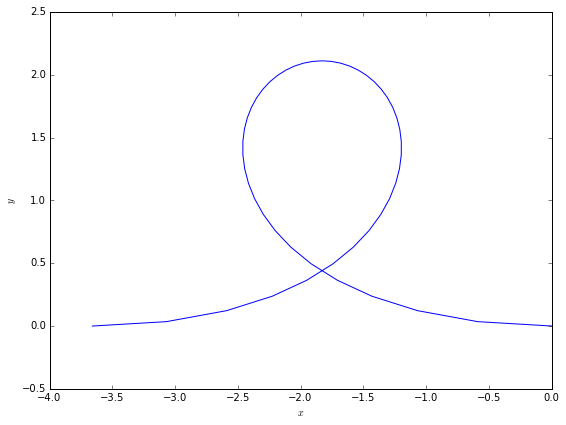

In [64]:
EI = 5000.   #kN m^2

H = 3600.    #kN m/m
F = -3500.    #kN

nEdges = 50
nVertex = nEdges + 1

if F > H:
    theta0 = np.arccos(H/F)
else:
    theta0 = np.pi
theta = np.linspace(theta0, -theta0, nVertex)

N = F*np.cos(theta)
Q = -F*np.sin(theta)
M = -np.sqrt(2*EI*(H - N))

h = np.zeros(nEdges)
h[:] = -2*(M[1:] - M[0:-1])/(Q[0:-1] + Q[1:])

kappa = M / EI
phi = np.zeros(nVertex-1)
rotor = np.zeros(nVertex-1) + 1j*np.zeros(nVertex-1)

phi[0] = theta0 + np.arctan(h[0]*kappa[0]/2)                  # modified code line
phi[1:] = 2.*np.arctan(kappa[1:-1]*(h[0:-1] + h[1:])/4.) 

rotor[0] = np.exp(1j*phi[0])
rotor[1:] = (4./(h[0:-1] + h[1:]) + 1j * kappa[1:-1])/(4./(h[0:-1] + h[1:]) - 1j * kappa[1:-1])

gamma = np.zeros(nVertex) + 1j*np.zeros(nVertex)
gamma[0] = 0.+0j
gamma[1] = gamma[0] + h[0]*rotor[0]
for n in range(1, nVertex-1):
    gamma[n+1] = gamma[n] + h[n]/h[n-1] * (gamma[n] - gamma[n-1]) * rotor[n]
    
fig = plt.figure(figsize=(9,9))

ax = fig.gca(aspect='equal')
ax.plot(gamma.real, gamma.imag, color='b')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

In [65]:
print('The y coordinate at the end section is now  y = {:.7f} m'.format(gamma[-1].imag))

The y coordinate at the end section is now  y = -0.0000056 m


All rotations except the first one have the same value along the rod. We can have a direct formula to calculate the end vertex of the rod given the first one.